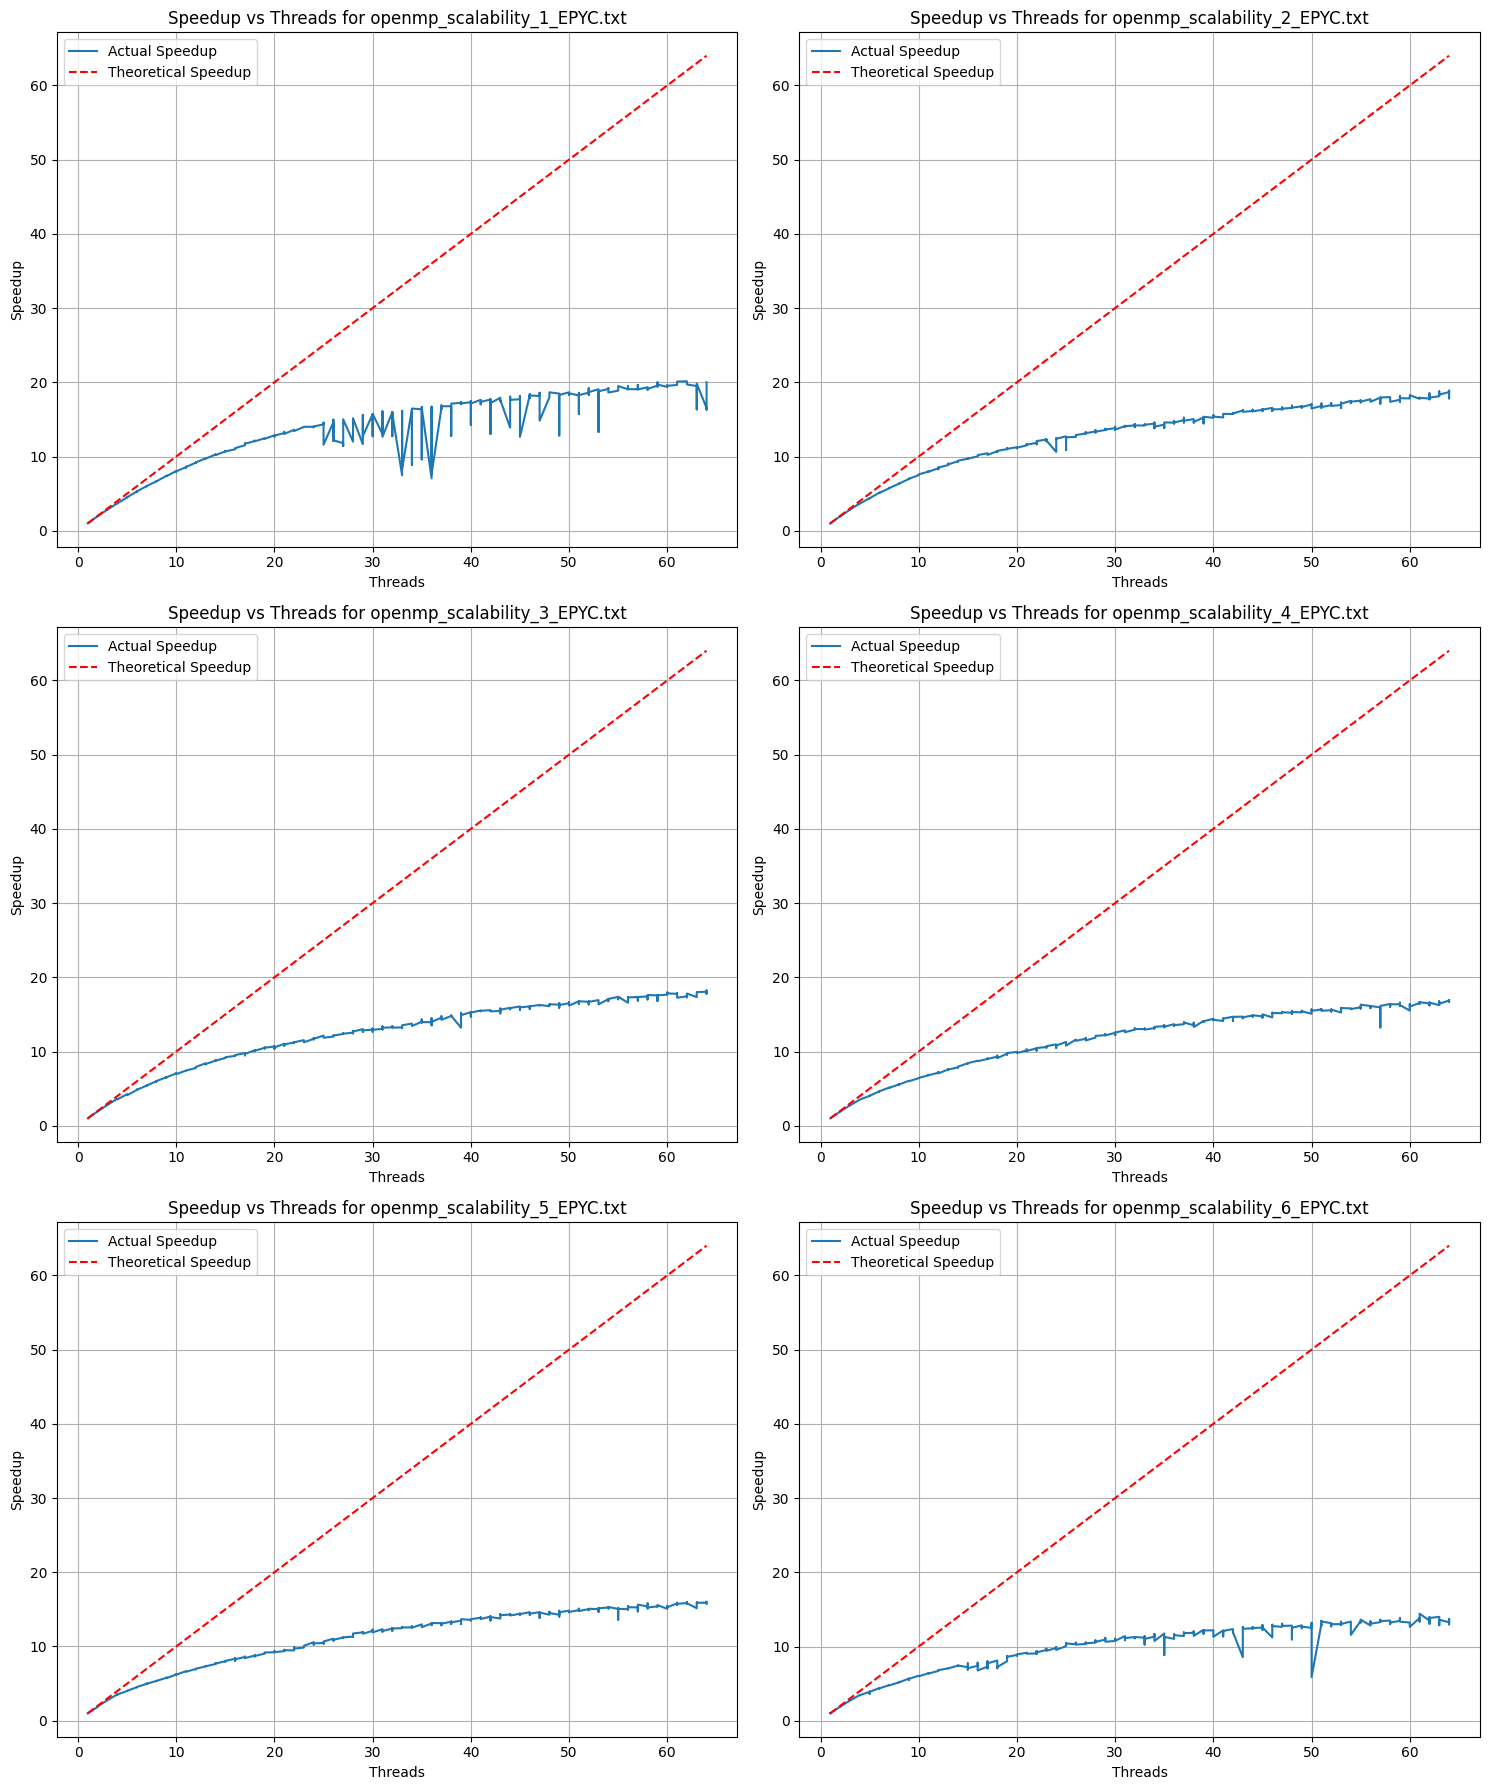

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Definire la funzione per leggere i dati dai file e calcolare lo speedup
def read_and_process_data(file_path):
    data = pd.read_csv(file_path, sep="\s+", header=None, names=["Size", "np", "Time", "Threads"])
    # Rimuovere le righe non valide
    data = data[pd.to_numeric(data["Time"], errors='coerce').notnull()]
    data["Time"] = data["Time"].astype(float)
    data["Threads"] = data["Threads"].astype(int)
    
    T1 = data[data["Threads"] == 1]["Time"].mean()
    data["Speedup"] = T1 / data["Time"]
    return data

# Lista dei file
file_pattern = "openmp_scalability_*_EPYC.txt"
file_list = glob.glob(file_pattern)

# Configurazione del plot
fig, axs = plt.subplots(3, 2, figsize=(15, 18))
axs = axs.flatten()

# Leggere e processare ogni file
for i, file in enumerate(file_list):
    data = read_and_process_data(file)
    
    # Plot threads vs speedup
    axs[i].plot(data["Threads"], data["Speedup"], label='Actual Speedup')
    
    # Plot theoretical speedup
    max_threads = data["Threads"].max()
    axs[i].plot(range(1, max_threads + 1), range(1, max_threads + 1), 'r--', label='Theoretical Speedup')
    
    axs[i].set_title(f'Speedup vs Threads for {os.path.basename(file)}')
    axs[i].set_xlabel('Threads')
    axs[i].set_ylabel('Speedup')
    axs[i].grid(True)
    axs[i].legend()

# Adattare il layout
plt.tight_layout()

# Salvare il grafico risultante
plt.savefig("openMP_scalability_epyc_64_plots.png")
plt.show()
